<StemContainer object of 3 artists>

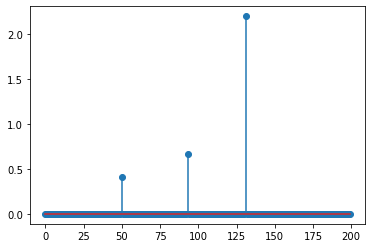

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# setup
m = 100;
n = 200;
A = np.random.randn(m,n)
x0 = np.zeros((n,1))

p = np.random.permutation(n)
x0[p[:3]] = np.random.randn(3,1)
y = np.ravel(A@x0)

lam = np.max(np.abs(A.T@y))/10

myobj = lambda beta: lam*np.sum(np.abs(beta))+1/2*np.linalg.norm(A@beta-y)**2


plt.stem(x0)

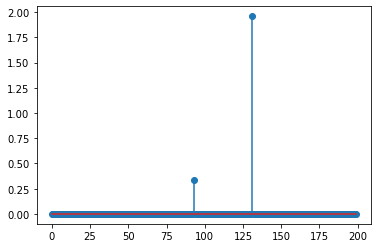

In [12]:
# sgd on u,v
u = np.ravel(np.random.randn(n,1)*0.0001);
v =np.ravel(np.random.randn(n,1)*0.0001);
xinit = u*v;
niter = 10000;
Rindx = np.random.randint(m, size=niter)
fvals_uv = np.ravel(np.zeros((niter,1)));

myobj_uv = lambda u,v: lam/2*np.linalg.norm(u)**2+lam/2*np.linalg.norm(v)**2+1/2*np.linalg.norm(A@(u*v)-y)**2


for j in range(niter):
    gamma = 0.01/(1+j)**0.51
    k = Rindx[j]
    Ai = A[k,:]
    w = m* np.ravel(Ai@(u*v) - y[k])*Ai.T
    uold = u
    u = u - gamma*v*w - lam*gamma*u
    v = v - gamma*uold*w - lam*gamma*v
    fvals_uv[j] = myobj(u*v);


plt.stem(u*v)
plt.show()



<StemContainer object of 3 artists>

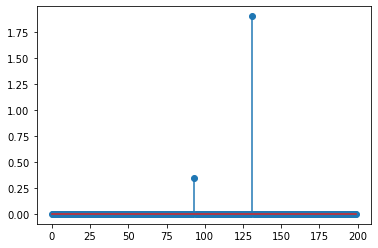

In [13]:
# proximal sgd
ones = np.ones(n,)
soft = lambda x,v: np.maximum(np.abs(x)-v*ones,0)*np.sign(x)
Rindx = np.random.randint(m, size=niter)
fvals_x = np.ravel(np.zeros((niter,1)));
x = xinit
for j in range(niter):
    gamma = 0.001/(1+j)**0.51;
    k = Rindx[j];
    Ai = A[k,:];
    w = m* np.ravel(Ai@x - y[k])*Ai.T;
    x =  soft(x - gamma*w, lam*gamma) ;
    fvals_x[j] = myobj(x);

plt.stem(x)


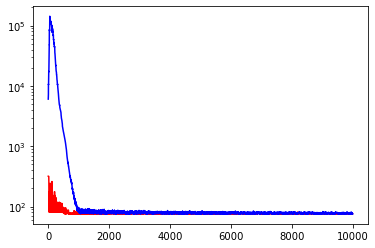

In [15]:
plt.semilogy(range(niter), fvals_uv , 'r') # plotting t, a separately 
plt.semilogy(range(niter), fvals_x, 'b') # plotting t, b separately 
plt.show()